In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [49]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [50]:
df.gender

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
62637     NaN
62638     NaN
62639     NaN
62640     NaN
62641    Male
Name: gender, Length: 62642, dtype: object

In [51]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [52]:

df.rename(
    {
        'level' : 'lv',
        'yearsofexperience' : 'yrOFexp' ,
        'yearsatcompany' : 'yrATcomp',
        'totalyearlycompensation' : 'totalcomp'
    },
    axis = 1, inplace=True
)



In [63]:
df['yr'] = df.timestamp.apply(lambda x: x.split('/')[2][:4])
df['month'] = df.timestamp.apply(lambda x: x.split('/')[0])
df['day'] = df.timestamp.apply(lambda x: x.split('/')[1])
df.dropna(subset=['gender'],inplace=True)
df_company=df.groupby('company')
df['gender_male'] = df['gender'] == "Male"
print(df_company['gender_male'].mean())

company
10x Genomics    1.000000
23andMe         1.000000
2U              1.000000
3M              0.941176
3m              0.666667
                  ...   
zillow          0.500000
zoominfo        1.000000
zoox            1.000000
zynga           1.000000
 Google         1.000000
Name: gender_male, Length: 1478, dtype: float64


Text(0.5, 1.0, 'Distribution gender ratio for company')

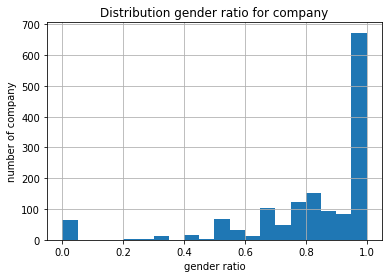

In [70]:
# df.yearsatcompany.hist()
# df.set_index('yrOFexp').groupby('company').basesalary.scatterplot()
# df.dropna(subset=['timestamp'],inplace=True)
# df.dropna(subset=['basesalary'],inplace=True)
# df.plot.scatter(x='timestamp',y='basesalary')

df_company.gender_male.mean().hist(bins=20)
plt.ylabel('number of company')
plt.xlabel('gender ratio')
plt.title('Distribution gender ratio for company')